In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
walmart = pd.read_csv('Walmart.csv')
features = pd.read_csv('features.csv')

In [77]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [78]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [123]:
walmart_data_store1 = walmart[walmart['Store'] == 1][['Date', 'Weekly_Sales']]
walmart_data_store1

,Date,Weekly_Sales
0,05-02-2010,1643690.90
1,12-02-2010,1641957.44
2,19-02-2010,1611968.17
3,26-02-2010,1409727.59
4,05-03-2010,1554806.68
...,...,...
138,28-09-2012,1437059.26
139,05-10-2012,1670785.97
140,12-10-2012,1573072.81
141,19-10-2012,1508068.77


In [103]:
import datetime
walmart_data_store1.set_index(walmart_data_store1['Date'], inplace=True)
walmart_data_store1.index = pd.DatetimeIndex(walmart_data_store1.index)

<Axes: xlabel='Date'>

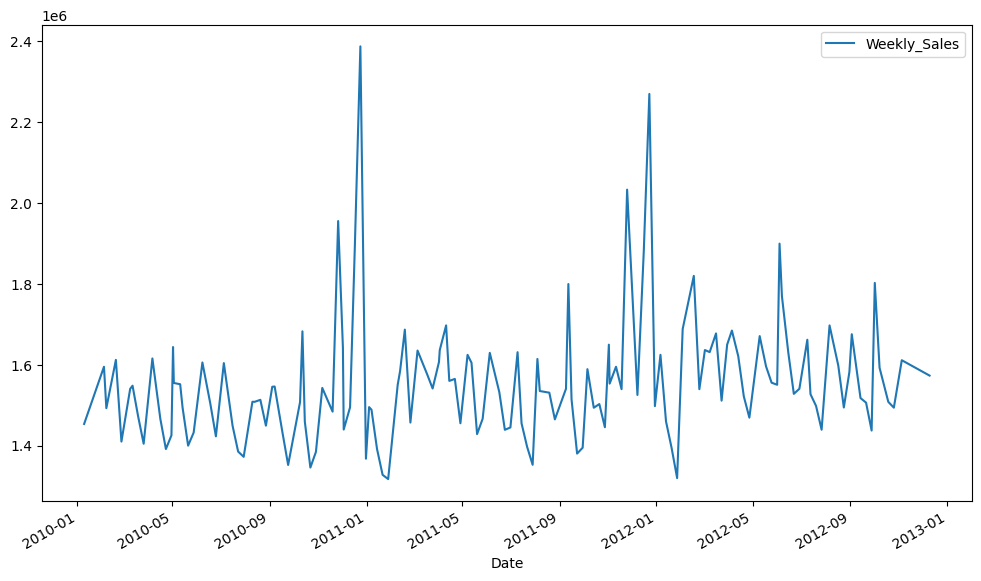

In [104]:
walmart_data_store1.plot(figsize=(12, 7))

In [82]:
from statsmodels.tsa.stattools import adfuller
adfuller(walmart_data_store1['Weekly_Sales'], autolag='AIC')

(-5.102186145192285,
 1.3877788330759535e-05,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3412.7325502876756)

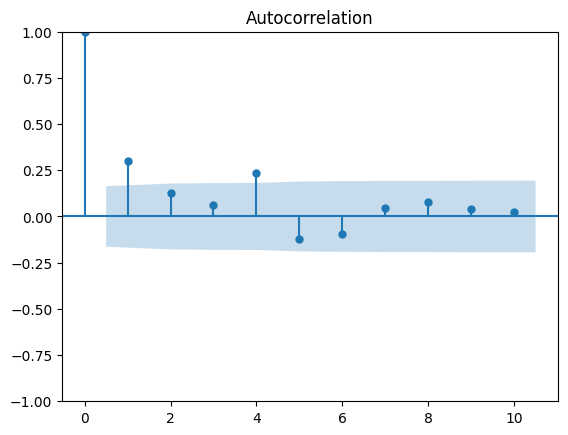

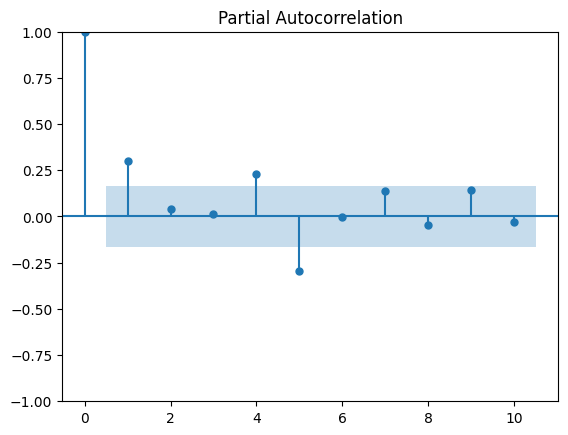

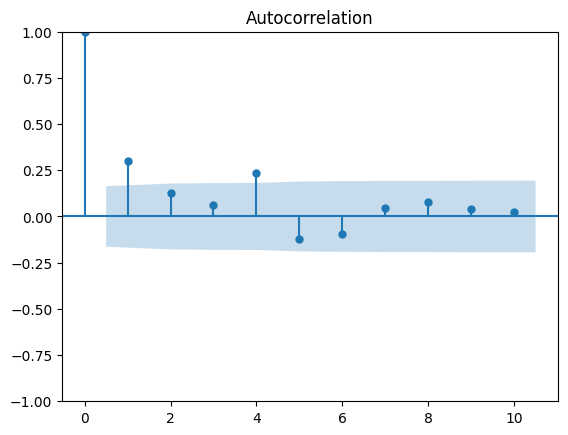

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(walmart_data_store1['Weekly_Sales'], lags=10)
plot_acf(walmart_data_store1['Weekly_Sales'], lags=10)

In [106]:
from statsmodels.tsa.arima.model import ARIMA
model_store1 = ARIMA(walmart_data_store1['Weekly_Sales'], order=(1, 0, 1)).fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [113]:
model_store1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1905.383
Date:                Sun, 29 Oct 2023   AIC                           3818.767
Time:                        22:55:02   BIC                           3830.618
Sample:                             0   HQIC                          3823.583
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.555e+06   2.24e+04     69.381      0.000    1.51e+06     1.6e+06
ar.L1          0.4740      0.313      1.517      0.129      -0.139       1.087
ma.L1         -0.1934      0.361     -0.536      0.592      -0.900       0.513
sigma2      2.227e+10      0.178   1.25e+11      0.000    2.23e+10    2.23e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               263.14
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             1.65
Prob(H) (two-sided):                  0.48   Kurtosis:                         8.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+25. Standard errors may be unstable.
"""

In [114]:
model_store1.predict()

Date
2010-05-02    1.555264e+06
2010-12-02    1.581656e+06
2010-02-19    1.584736e+06
2010-02-26    1.576877e+06
2010-05-03    1.518602e+06
                  ...     
2012-09-28    1.540574e+06
2012-05-10    1.519252e+06
2012-12-10    1.580719e+06
2012-10-19    1.565184e+06
2012-10-26    1.543938e+06
Name: predicted_mean, Length: 143, dtype: float64

In [122]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(walmart_data_store1['Weekly_Sales'], model_store1.predict()))

148022.70636396817

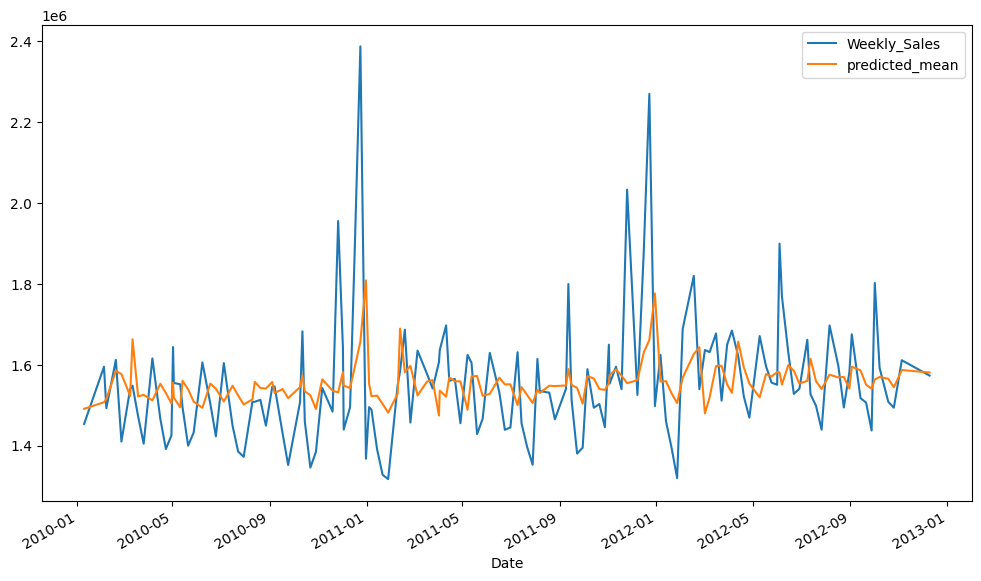

In [119]:
walmart_data_store1.plot(figsize=(12, 7))
model_store1.predict().plot(figsize=(12, 7))
plt.legend()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


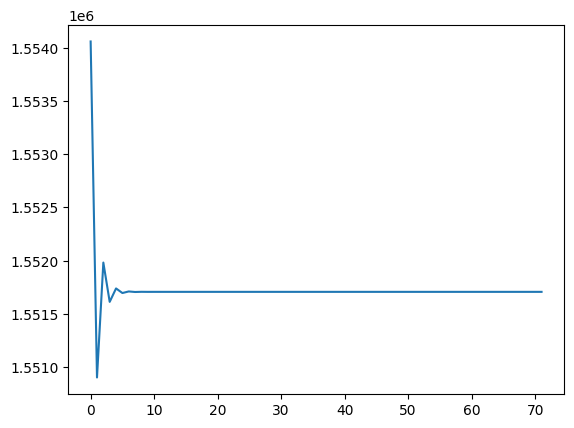

In [90]:
plt.plot([model_store1.predict(i) for i in range (128, 200)])

In [91]:

model_store1 = ARIMA(weekly_store1, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(weekly_store1).plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [95]:
weekly_store1

Date
2010-01-04/2010-01-10    1453329.500
2010-02-01/2010-02-07    1543693.210
2010-02-15/2010-02-21    1611968.170
2010-02-22/2010-02-28    1409727.590
2010-03-08/2010-03-14    1544098.655
                            ...     
2012-10-08/2012-10-14    1592409.970
2012-10-15/2012-10-21    1508068.770
2012-10-22/2012-10-28    1493659.740
2012-11-05/2012-11-11    1611096.050
2012-12-10/2012-12-16    1573072.810
Freq: W-SUN, Name: Weekly_Sales, Length: 127, dtype: float64

Date
2010-01-10    1453329.500
2010-02-07    1543693.210
2010-02-21    1611968.170
2010-02-28    1409727.590
2010-03-14    1544098.655
                 ...     
2012-10-14    1592409.970
2012-10-21    1508068.770
2012-10-28    1493659.740
2012-11-11    1611096.050
2012-12-16    1573072.810
Name: Weekly_Sales, Length: 127, dtype: float64